In [39]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./data/11-26/daily_plutchik_threshold_5.csv', parse_dates=['month/day'])
approval_rating_df = pd.read_csv('./data/approval_polllist.csv', parse_dates=["enddate"])
topic_df = pd.read_excel('./data/TopicScoresPerDay_Final.xlsx')
sentiment_df = pd.read_csv('./data/12-6/daily_senti_corrected.csv', parse_dates=['month/day'])

In [40]:
def zscore(df, col):
    col_mean = df[col].rolling(window=14, center=True).mean()
    col_std = df[col].rolling(window=14, center=True).std()
    return (df[col] - col_mean)/col_std

In [41]:
df["Anticipation Z-Score"] = zscore(df, "Anticipation")
df["Trust Z-Score"] = zscore(df, "Trust")
df["Surprise Z-Score"] = zscore(df, "Surprise")
df["Sadness Z-Score"] = zscore(df, "Sadness")
df["Joy Z-Score"] = zscore(df, "Joy")
df["Fear Z-Score"] = zscore(df, "Fear")
df["Disgust Z-Score"] = zscore(df, "Disgust")
df["Anger Z-Score"] = zscore(df, "Anger")
df.fillna(0, inplace=True)

In [42]:
topic_df = topic_df.drop(['Filename', 'Segment', 'WC', 'WPS', 'Sixltr', 'Dic', 
                          'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 
                          'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP', 
                          'Em1', 'Em2', 'Em3', 'Em4', 'Em5', 'Em6', 'Em7', 'Em8', 'Gallup Value'], axis=1)

for (columnName, columnData) in topic_df.iteritems():
    topic_df[columnName + " Z-Score"] = zscore(topic_df, columnName)
    
topic_df = topic_df[66:237]
topic_df.fillna(0, inplace=True)
topic_df.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,...,topic492 Z-Score,topic493 Z-Score,topic494 Z-Score,topic495 Z-Score,topic496 Z-Score,topic497 Z-Score,topic498 Z-Score,topic499 Z-Score,topic500 Z-Score,topic501 Z-Score
66,6.46,0.0,0.00,0.05,0.0,0.01,0.64,0.57,0.19,0.65,...,0.194023,2.163111,1.089956,-0.491032,1.429682,0.413594,-0.702665,1.065521,1.432840,-0.507075
67,6.12,0.0,0.00,0.04,0.0,0.01,0.46,0.65,0.08,0.49,...,0.769534,-0.151553,-0.433117,-0.479883,0.629919,1.120638,-0.401764,-1.296174,-1.321625,-0.372797
68,6.20,0.0,0.01,0.01,0.0,0.02,0.61,0.51,0.10,0.69,...,0.461597,-1.572928,-0.890207,1.424433,1.097163,1.309574,-0.475466,-1.355222,-2.163202,-0.066748
69,6.08,0.0,0.00,0.03,0.0,0.02,0.47,0.50,0.07,0.67,...,-0.503236,0.630641,2.372378,2.064031,-0.495156,-0.901418,-0.321563,0.105594,0.360875,-0.514077
70,5.97,0.0,0.00,0.06,0.0,0.02,0.45,0.63,0.06,0.21,...,-0.493518,-0.165357,-1.091842,-0.820724,-0.338300,-1.210769,-1.583182,1.308417,0.067327,-0.723097


In [43]:
filter_col = [col for col in topic_df if col.endswith("Z-Score")]
topic_df = topic_df[filter_col]
topic_df.head()

,topic1 Z-Score,topic2 Z-Score,topic3 Z-Score,topic4 Z-Score,topic5 Z-Score,topic6 Z-Score,topic7 Z-Score,topic8 Z-Score,topic9 Z-Score,topic10 Z-Score,...,topic492 Z-Score,topic493 Z-Score,topic494 Z-Score,topic495 Z-Score,topic496 Z-Score,topic497 Z-Score,topic498 Z-Score,topic499 Z-Score,topic500 Z-Score,topic501 Z-Score
66,1.021734,0.0,-0.267261,1.519979e+00,-0.267261,-0.424212,0.858944,0.497919,2.562713,0.389045,...,0.194023,2.163111,1.089956,-0.491032,1.429682,0.413594,-0.702665,1.065521,1.432840,-0.507075
67,-0.084203,0.0,-0.267261,7.318418e-01,-0.393398,-0.424212,-0.699777,1.011870,-0.705266,-0.829156,...,0.769534,-0.151553,-0.433117,-0.479883,0.629919,1.120638,-0.401764,-1.296174,-1.321625,-0.372797
68,0.190444,0.0,3.474396,-1.537412e+00,-0.393398,0.755929,0.610476,0.015365,-0.174485,0.724042,...,0.461597,-1.572928,-0.890207,1.424433,1.097163,1.309574,-0.475466,-1.355222,-2.163202,-0.066748
69,-0.132464,0.0,-0.267261,-2.133588e-15,-0.393398,0.862958,-0.431890,-0.089888,-1.128386,0.471500,...,-0.503236,0.630641,2.372378,2.064031,-0.495156,-0.901418,-0.321563,0.105594,0.360875,-0.514077
70,-0.498835,0.0,-0.267261,2.308116e+00,-0.393398,0.862958,-0.492359,0.877262,-1.508512,-2.808116,...,-0.493518,-0.165357,-1.091842,-0.820724,-0.338300,-1.210769,-1.583182,1.308417,0.067327,-0.723097


In [44]:
import csv

significant_topics = list()
with open('./significant_topics.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        significant_topics.append(row[0])

significant_topics_df = topic_df[significant_topics]
significant_topics_df.head()
significant_topics_df = significant_topics_df.reset_index(drop=True)
significant_topics_df.head()

,topic448 Z-Score,topic492 Z-Score,topic337 Z-Score,topic374 Z-Score,topic473 Z-Score,topic478 Z-Score,topic104 Z-Score,topic10 Z-Score,topic289 Z-Score,topic386 Z-Score,...,topic209 Z-Score,topic352 Z-Score,topic476 Z-Score,topic469 Z-Score,topic164 Z-Score,topic167 Z-Score,topic358 Z-Score,topic174 Z-Score,topic67 Z-Score,topic437 Z-Score
0,-0.910524,0.194023,0.262874,-0.735523,-1.287484,0.498039,1.898131,0.389045,0.951558,1.143782,...,0.250292,-0.601396,0.821961,0.418879,-0.728331,0.705266,0.000000,-0.160924,-8.451005e-01,-0.335111
1,0.123091,0.769534,-0.144453,-0.249152,-0.694632,-0.216239,-0.762905,-0.829156,-0.873348,0.519142,...,-0.937465,1.830916,-0.606387,1.131229,0.826013,-0.399190,0.058428,-0.655906,3.675118e-01,0.229882
2,-0.081582,0.461597,0.464226,-0.688115,-0.662536,-0.016178,-1.935651,0.724042,-0.361046,-0.020333,...,-0.692823,0.329683,-1.545618,-0.226718,1.263692,-0.112415,0.150493,-0.844817,2.049498e+00,1.274386
3,-0.174115,-0.503236,1.845200,0.394577,-0.306614,-0.111482,0.779406,0.471500,0.630041,0.464364,...,1.405537,-0.984511,-0.468532,0.216204,-0.824463,0.318689,-0.250906,-0.149085,2.190326e-15,-0.382905
4,2.810797,-0.493518,-2.148618,2.773039,1.763879,-2.599943,1.202340,-2.808116,2.002129,1.608392,...,2.469377,1.407731,2.256563,-2.299332,1.585361,-1.274755,0.031961,2.981707,1.325698e+00,-1.749701


In [45]:
from pyramid.arima.stationarity import ADFTest

adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df["Anticipation Z-Score"])

(0.99, False)

In [46]:
import datetime

start_date = datetime.datetime(2017, 7, 12, 0, 0)
end_date = datetime.datetime(2017, 12, 31, 0, 0)
dated_df = df[(df["month/day"] > start_date) & (df["month/day"] < end_date)]
dated_df = dated_df.reset_index(drop=True)
train_df = dated_df[:120]
test_df = dated_df[120:]
print(len(dated_df), len(train_df), len(test_df))
dated_df.head()

171 120 51


,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
0,2017-07-13,0.025688,0.022018,0.036697,0.122936,0.027523,0.132110,0.620183,0.012844,2.252087,-0.827227,0.896344,-0.484259,0.977056,-1.393388,-0.307671,0.951454
1,2017-07-14,0.015248,0.017789,0.054638,0.121982,0.034307,0.113088,0.635324,0.007624,0.667345,-0.652236,0.315559,0.635090,0.981600,0.819333,-0.809876,-1.021932
2,2017-07-15,0.013717,0.019204,0.046639,0.130316,0.038409,0.116598,0.626886,0.008230,0.859557,-0.902594,0.458054,1.209822,1.440038,-0.086540,-0.579125,-1.226268
3,2017-07-16,0.022744,0.030814,0.038151,0.118855,0.031548,0.131328,0.620690,0.005869,0.061561,-1.197078,1.424133,0.206330,0.811716,-1.058276,1.217188,0.611709
4,2017-07-17,0.022989,0.007663,0.034483,0.099617,0.034483,0.061303,0.735632,0.003831,-0.688659,1.712400,-1.867824,0.329168,-0.134768,-1.463465,-2.360562,0.725312


In [47]:
for (columnName, columnData) in sentiment_df.iteritems():
    if columnName != "month/day":
        sentiment_df[columnName+" Z-Score"] = zscore(sentiment_df, columnName)
sentiment_df = sentiment_df[(sentiment_df["month/day"] > start_date) & (sentiment_df["month/day"] < end_date)]
sentiment_df = sentiment_df[['pos_sentiment Z-Score', 'neg_sentiment Z-Score', 'neu_sentiment Z-Score']]
sentiment_df = sentiment_df.rename(columns={'pos_sentiment Z-Score':'Positive Sentiment Z-Score', 'neg_sentiment Z-Score': 'Negative Sentiment Z-Score', 'neu_sentiment Z-Score': 'Neutral Sentiment Z-Score'})
sentiment_df = sentiment_df.reset_index(drop=True)
sentiment_df.head()

,Positive Sentiment Z-Score,Negative Sentiment Z-Score,Neutral Sentiment Z-Score
0,1.339725,-0.882616,-0.535477
1,0.723188,-0.960567,0.695292
2,1.445375,-1.252709,0.201804
3,-0.453674,0.663924,-0.590644
4,0.058015,0.762438,-1.515081


In [48]:
truncated_approvals = approval_rating_df.loc[approval_rating_df['pollster'] == 'Ipsos']
truncated_approvals = truncated_approvals.loc[truncated_approvals['subgroup'] == 'All polls']
truncated_approvals = truncated_approvals[(truncated_approvals['enddate'] > start_date) & (truncated_approvals['enddate'] < end_date)]
preserved_approvals_df = truncated_approvals
truncated_approvals = truncated_approvals['adjusted_approve']
truncated_approvals = truncated_approvals.reset_index(drop=True)

In [49]:
dated_df = dated_df[['Anticipation Z-Score', 'Trust Z-Score', 'Surprise Z-Score', 'Sadness Z-Score', 'Joy Z-Score', 'Fear Z-Score', 'Disgust Z-Score', 'Anger Z-Score']]
dated_df.head()

,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
0,2.252087,-0.827227,0.896344,-0.484259,0.977056,-1.393388,-0.307671,0.951454
1,0.667345,-0.652236,0.315559,0.635090,0.981600,0.819333,-0.809876,-1.021932
2,0.859557,-0.902594,0.458054,1.209822,1.440038,-0.086540,-0.579125,-1.226268
3,0.061561,-1.197078,1.424133,0.206330,0.811716,-1.058276,1.217188,0.611709
4,-0.688659,1.712400,-1.867824,0.329168,-0.134768,-1.463465,-2.360562,0.725312


In [50]:
all_data_df = pd.concat([dated_df, significant_topics_df, sentiment_df], axis=1)
print(len(all_data_df))
print(all_data_df.isnull().values.any())
all_data_df.head()

171
False


,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score,topic448 Z-Score,topic492 Z-Score,...,topic469 Z-Score,topic164 Z-Score,topic167 Z-Score,topic358 Z-Score,topic174 Z-Score,topic67 Z-Score,topic437 Z-Score,Positive Sentiment Z-Score,Negative Sentiment Z-Score,Neutral Sentiment Z-Score
0,2.252087,-0.827227,0.896344,-0.484259,0.977056,-1.393388,-0.307671,0.951454,-0.910524,0.194023,...,0.418879,-0.728331,0.705266,0.000000,-0.160924,-8.451005e-01,-0.335111,1.339725,-0.882616,-0.535477
1,0.667345,-0.652236,0.315559,0.635090,0.981600,0.819333,-0.809876,-1.021932,0.123091,0.769534,...,1.131229,0.826013,-0.399190,0.058428,-0.655906,3.675118e-01,0.229882,0.723188,-0.960567,0.695292
2,0.859557,-0.902594,0.458054,1.209822,1.440038,-0.086540,-0.579125,-1.226268,-0.081582,0.461597,...,-0.226718,1.263692,-0.112415,0.150493,-0.844817,2.049498e+00,1.274386,1.445375,-1.252709,0.201804
3,0.061561,-1.197078,1.424133,0.206330,0.811716,-1.058276,1.217188,0.611709,-0.174115,-0.503236,...,0.216204,-0.824463,0.318689,-0.250906,-0.149085,2.190326e-15,-0.382905,-0.453674,0.663924,-0.590644
4,-0.688659,1.712400,-1.867824,0.329168,-0.134768,-1.463465,-2.360562,0.725312,2.810797,-0.493518,...,-2.299332,1.585361,-1.274755,0.031961,2.981707,1.325698e+00,-1.749701,0.058015,0.762438,-1.515081


In [51]:
from pmdarima import auto_arima

arima_model = auto_arima(truncated_approvals, exogenous=dated_df, start_p=1, start_q=1, start_P=1, start_Q=1,
                           max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True, stepwise=True, suppress_warnings=True,error_action='ignore')

In [52]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  171
Model:               SARIMAX(0, 0, 4)   Log Likelihood                -194.264
Date:                Wed, 11 Dec 2019   AIC                            416.528
Time:                        14:07:15   BIC                            460.511
Sample:                             0   HQIC                           434.374
                                - 171                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     37.6611      0.243    155.258      0.000      37.186      38.137
x1             0.0311      0.048      0.651      0.515      -0.063       0.125
x2             0.0334      0.111      0.302      0.763      -0.183       0.250
x3             0.0327      0.068      0.481      0.631      -0.100       0.166
x4            -0.0097      0.058     -0.167      0.867      -0.124       0.104
x5             0.0544      0.084      0.650      0.516      -0.110       0.218
x6             0.0931      0.072      1.285      0.199      -0.049       0.235
x7             0.0138      0.050      0.277      0.782      -0.084       0.112
x8             0.0387      0.055      0.707      0.480      -0.069       0.146
ma.L1          0.9277      0.067     13.792      0.000       0.796       1.060
ma.L2          0.9081      0.079     11.456      0.000       0.753       1.064
ma.L3          0.8019      0.085      9.443      0.000       0.635       0.968
ma.L4          0.6303      0.076      8.242      0.000       0.480       0.780
sigma2         0.5583      0.064      8.671      0.000       0.432       0.685
===================================================================================
Ljung-Box (Q):                       26.26   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.95   Prob(JB):                         0.85
Heteroskedasticity (H):               0.85   Skew:                             0.08
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
full_arima_model = auto_arima(truncated_approvals, exogenous=all_data_df, start_p=1, start_q=1, start_P=1, start_Q=1,
                           max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True, stepwise=True, suppress_warnings=True,error_action='ignore')

In [76]:
full_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  171
Model:                        SARIMAX   Log Likelihood                -433.517
Date:                Wed, 11 Dec 2019   AIC                           1141.034
Time:                        14:36:17   BIC                           1571.442
Sample:                             0   HQIC                          1315.675
                                - 171                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     37.2417      0.749     49.719      0.000      35.774      38.710
x1            -1.3547      1.940     -0.698      0.485      -5.157       2.448
x2            -2.1300      5.526     -0.385      0.700     -12.960       8.700
x3            -4.3357      3.636     -1.192      0.233     -11.463       2.792
x4            -1.0965      2.203     -0.498      0.619      -5.415       3.222
x5             0.7823      3.389      0.231      0.817      -5.860       7.424
x6            -3.6265      3.641     -0.996      0.319     -10.763       3.510
x7             1.3772      2.237      0.616      0.538      -3.007       5.762
x8            -1.2717      2.938     -0.433      0.665      -7.030       4.486
x9            -0.9320      1.743     -0.535      0.593      -4.349       2.485
x10            1.4911      1.769      0.843      0.399      -1.977       4.959
x11           -2.3560      3.363     -0.700      0.484      -8.948       4.236
x12            3.2149      2.398      1.341      0.180      -1.485       7.915
x13            2.9575      2.868      1.031      0.302      -2.664       8.579
x14            1.8480      3.780      0.489      0.625      -5.561       9.257
x15           -1.6247      4.522     -0.359      0.719     -10.487       7.238
x16           -4.4457      3.791     -1.173      0.241     -11.875       2.984
x17           -0.4150      2.134     -0.194      0.846      -4.597       3.767
x18            4.1535      2.933      1.416      0.157      -1.595       9.902
x19           -0.7628      2.005     -0.380      0.704      -4.693       3.167
x20           -2.9807      2.629     -1.134      0.257      -8.133       2.172
x21           -1.6875      5.274     -0.320      0.749     -12.024       8.649
x22           -1.5009      2.217     -0.677      0.498      -5.846       2.844
x23           -1.2575      2.831     -0.444      0.657      -6.806       4.291
x24            2.2077      2.130      1.036      0.300      -1.968       6.383
x25           -1.7236      2.053     -0.840      0.401      -5.747       2.300
x26            1.4907      2.830      0.527      0.598      -4.056       7.038
x27           -1.8339      2.398     -0.765      0.444      -6.535       2.867
x28            0.7336      3.825      0.192      0.848      -6.763       8.230
x29           -0.2831      2.463     -0.115      0.909      -5.111       4.545
x30           -5.3553      6.225     -0.860      0.390     -17.556       6.845
x31           -5.4655      2.694     -2.029      0.042     -10.746      -0.185
x32            0.5973      1.265      0.472      0.637      -1.882       3.077
x33           -0.9847      3.018     -0.326      0.744      -6.901       4.931
x34            2.6866      1.920      1.399      0.162      -1.077       6.450
x35           -3.0267      2.720     -1.113      0.266      -8.358       2.305
x36           -0.1554      3.094     -0.050      0.960      -6.219       5.909
x37           -2.6900      2.898     -0.928      0.353      -8.371       2.991
x3

In [77]:
training_approvals = truncated_approvals[:135]
test_approvals = truncated_approvals[135:]
training_data = all_data_df[:135]
test_data = all_data_df[135:]
print(len(training_approvals), len(test_approvals), len(training_data), len(test_data))
print(len(training_data.columns))
training_approvals.head()

135 36 135 36
135


0    41.35173
1    42.25173
2    40.95173
3    40.95173
4    38.45173
Name: adjusted_approve, dtype: float64

In [78]:
partial_model = auto_arima(training_approvals, exogenous=training_data, start_p=1, start_q=1, start_P=1, start_Q=1,
                           max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True, stepwise=True)

In [79]:
partial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  135
Model:                        SARIMAX   Log Likelihood                1430.591
Date:                Wed, 11 Dec 2019   AIC                          -2587.182
Time:                        14:36:37   BIC                          -2189.160
Sample:                             0   HQIC                         -2425.437
                                - 135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.587e-08      0.000     -0.001      1.000      -0.000       0.000
x1           -94.0228      0.000  -6.08e+05      0.000     -94.023     -94.023
x2          -147.0228      0.001  -2.54e+05      0.000    -147.024    -147.022
x3          -362.7296      0.000  -1.03e+06      0.000    -362.730    -362.729
x4           -98.1445      0.000  -3.16e+05      0.000     -98.145     -98.144
x5           301.8442      0.000   9.78e+05      0.000     301.844     301.845
x6            30.3248      0.000   9.85e+04      0.000      30.324      30.325
x7            61.8096      0.000   2.36e+05      0.000      61.809      61.810
x8          -120.7447      0.001  -2.31e+05      0.000    -120.746    -120.744
x9            17.9538      0.000    5.8e+04      0.000      17.953      17.954
x10          184.9273      0.000   1.09e+06      0.000     184.927     184.928
x11         -135.1784      0.000  -5.29e+05      0.000    -135.179    -135.178
x12            6.2700      0.000   2.43e+04      0.000       6.269       6.270
x13          171.8417      0.001   3.17e+05      0.000     171.841     171.843
x14           12.7269      0.001   1.14e+04      0.000      12.725      12.729
x15         -250.3531      0.000  -7.98e+05      0.000    -250.354    -250.353
x16         -120.1698      0.001     -2e+05      0.000    -120.171    -120.169
x17          153.4254      0.000   8.43e+05      0.000     153.425     153.426
x18          378.1175      0.000   8.71e+05      0.000     378.117     378.118
x19         -298.6045      0.000  -1.33e+06      0.000    -298.605    -298.604
x20         -104.7373      0.000  -2.53e+05      0.000    -104.738    -104.736
x21         -283.3633      0.001  -4.53e+05      0.000    -283.364    -283.362
x22          265.9220      0.000   5.59e+05      0.000     265.921     265.923
x23           28.8284      0.000   1.36e+05      0.000      28.828      28.829
x24         -270.1430      0.000  -1.29e+06      0.000    -270.143    -270.143
x25          -85.4636      0.000  -4.14e+05      0.000     -85.464     -85.463
x26          203.7995      0.000   9.49e+05      0.000     203.799     203.800
x27         -125.5498      0.000  -4.38e+05      0.000    -125.550    -125.549
x28           17.7072      0.000   4.28e+04      0.000      17.706      17.708
x29          -31.5979      0.000  -1.42e+05      0.000     -31.598     -31.597
x30          195.2345      0.001   3.66e+05      0.000     195.233     195.236
x31          126.8532      0.001   1.34e+05      0.000     126.851     126.855
x32           81.0733      0.000   3.07e+05      0.000      81.073      81.074
x33           83.6534      0.000   2.63e+05      0.000      83.653      83.654
x34          -48.5804      0.001  -9.71e+04      0.000     -48.581     -48.579
x35         -107.9062      0.000  -3.89e+05      0.000    -107.907    -107.906
x36         -167.8116      0.000  -4.77e+05      0.000    -167.812    -167.811
x37           78.7707      0.000   1.67e+05      0.000      78.770      78.772
x3

In [84]:
# test_data = test_data.reset_index(drop=True)
prediction = pd.DataFrame(partial_model.predict(n_periods=36, exogenous=test_data))
prediction.columns=['Predicted Approval Rating']

In [85]:
prediction.head()

,Predicted Approval Rating
0,-576.679534
1,2298.641855
2,-129.276240
3,-1707.023140
4,-902.953293


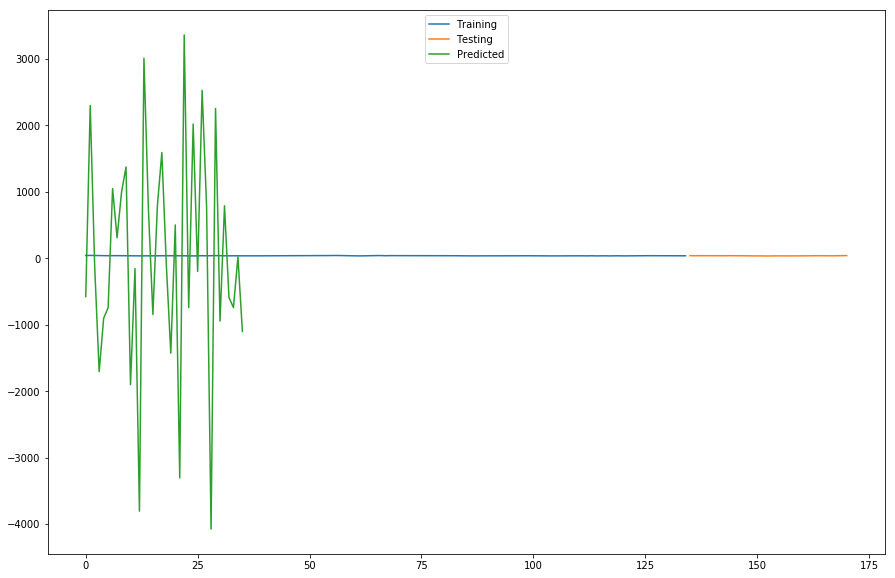

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(training_approvals, label='Training')
plt.plot(test_approvals, label='Testing')
plt.plot(prediction, label='Predicted')
plt.legend(loc='upper center')
plt.show()